In [1386]:
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

from joblib import dump, load




In [1387]:
df = pd.read_csv('train_revised.csv')
df2 = pd.read_csv('test_questions.csv')

In [1388]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [1389]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


                                             |          | [  0%]   00:00 -> (? left)


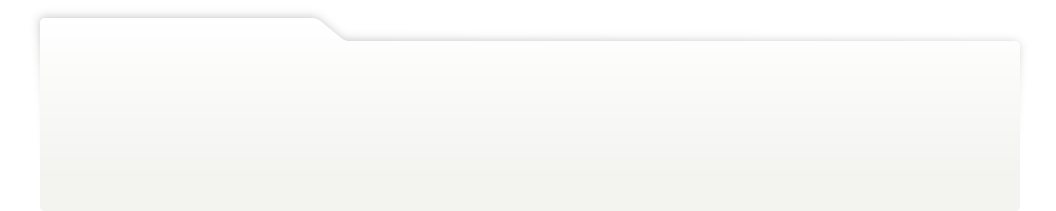
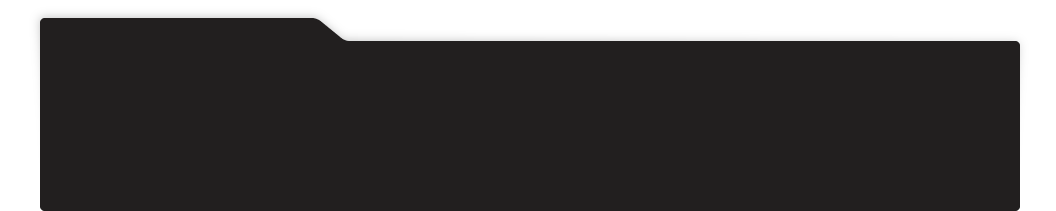
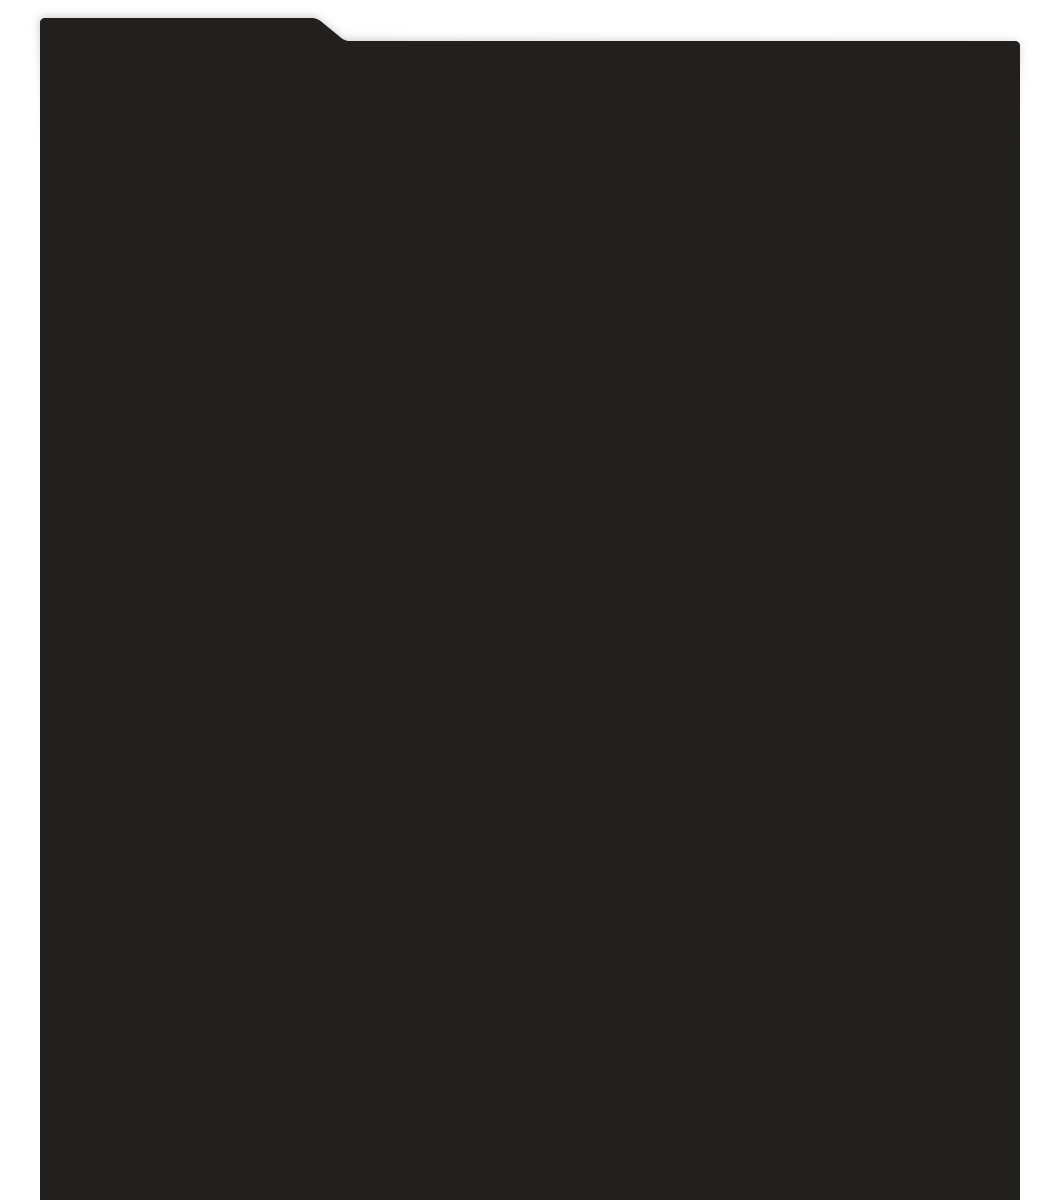
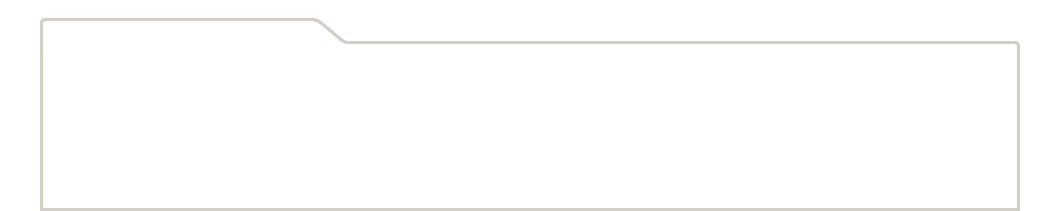
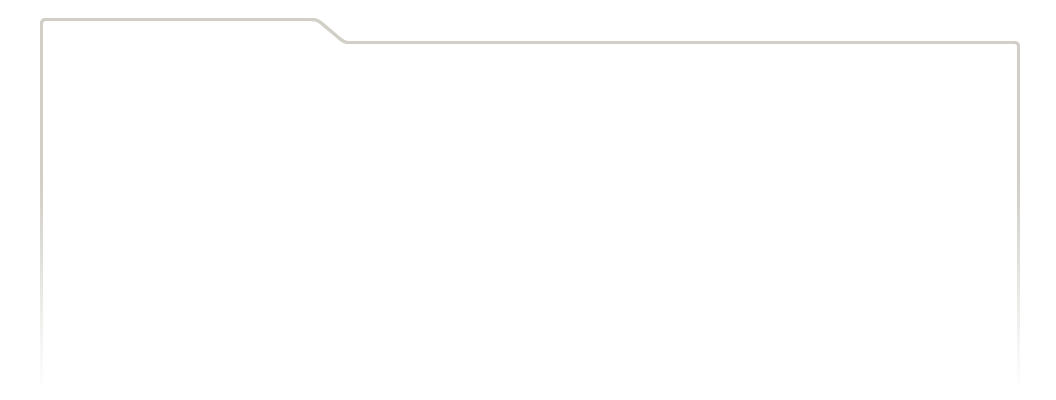
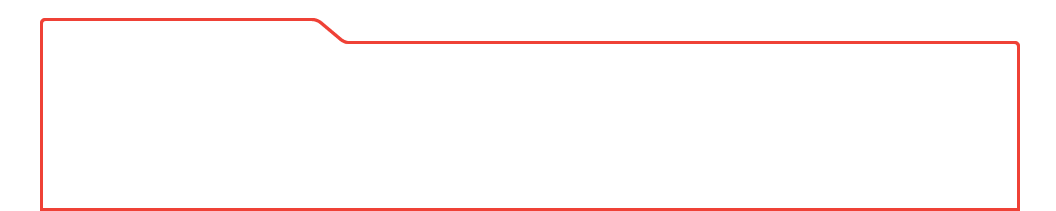
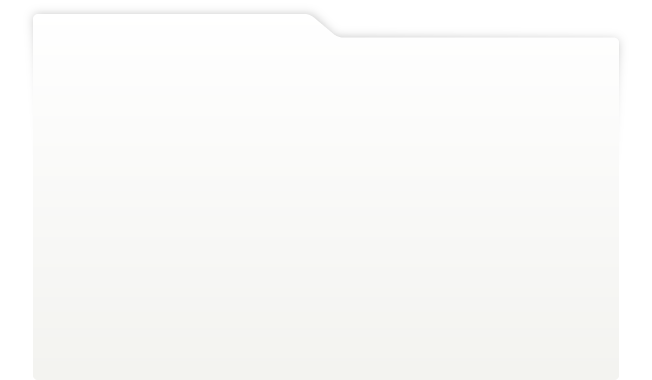
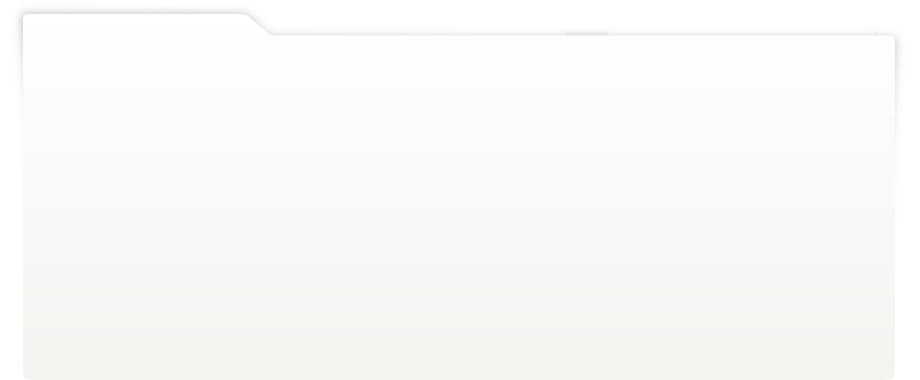
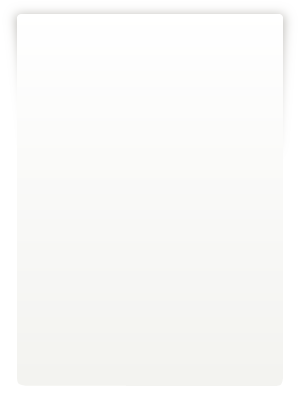
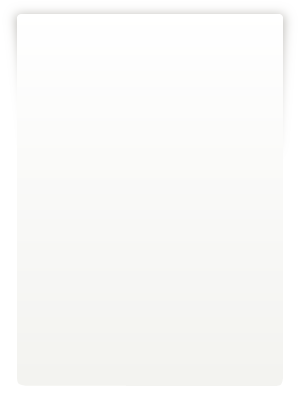
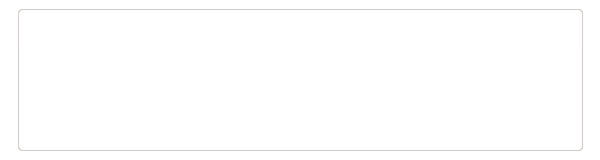
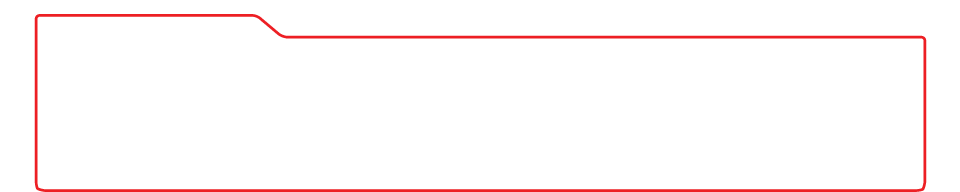
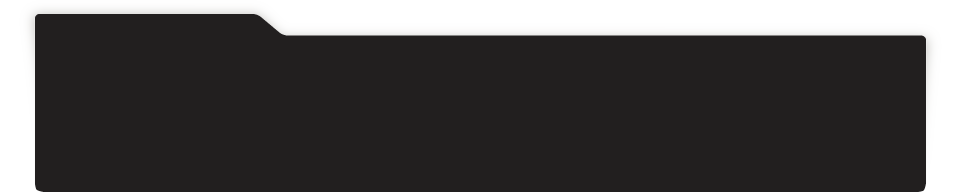
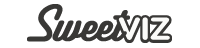
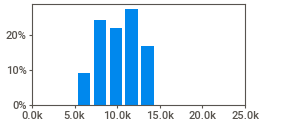
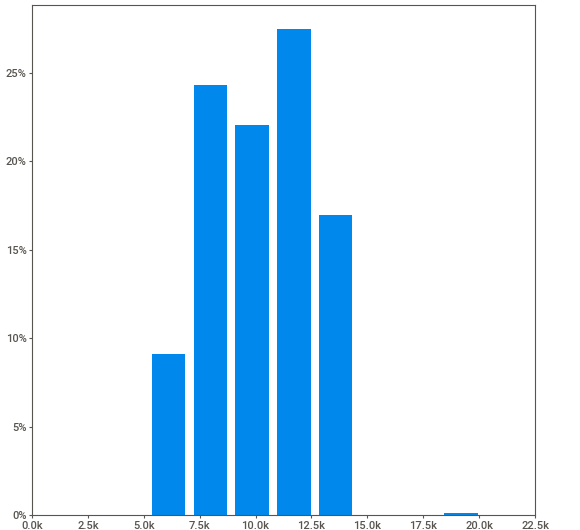
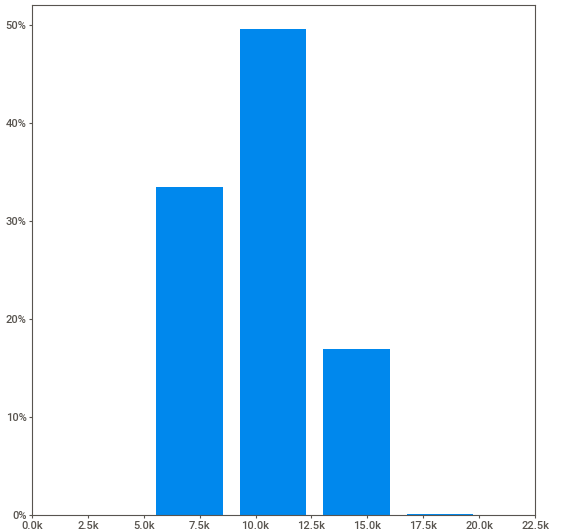
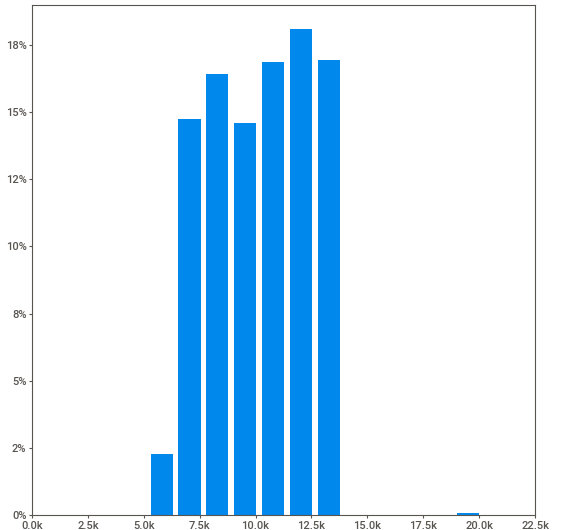
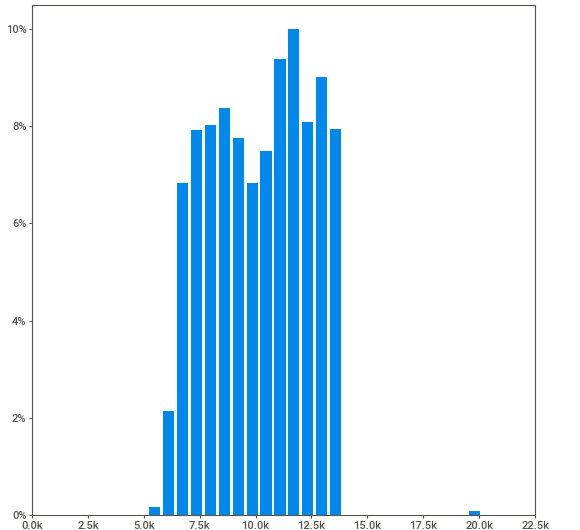
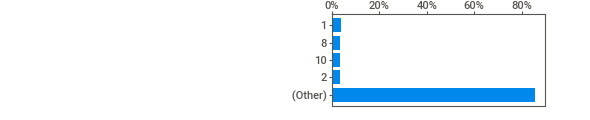
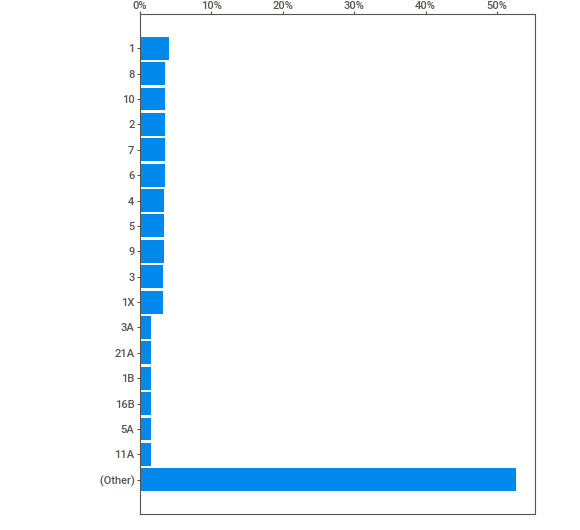
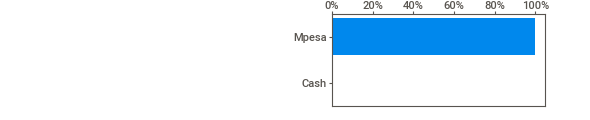
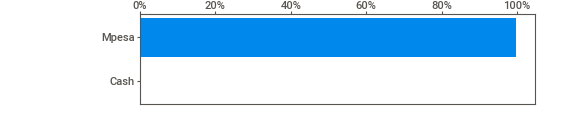
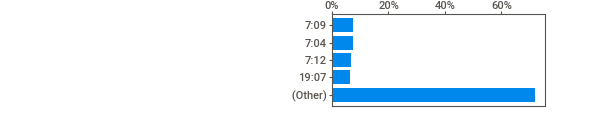
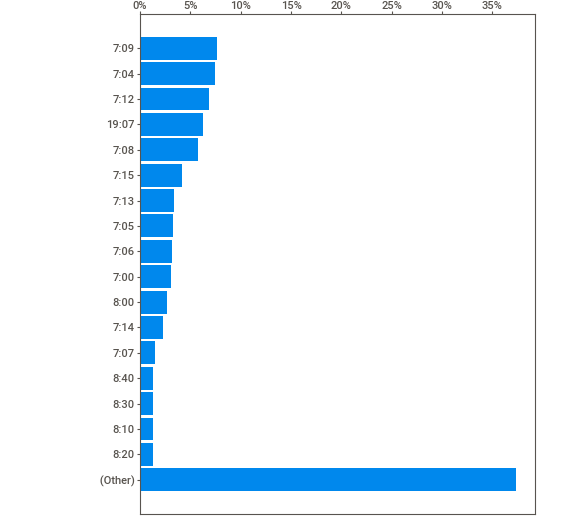
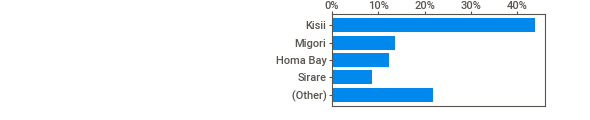
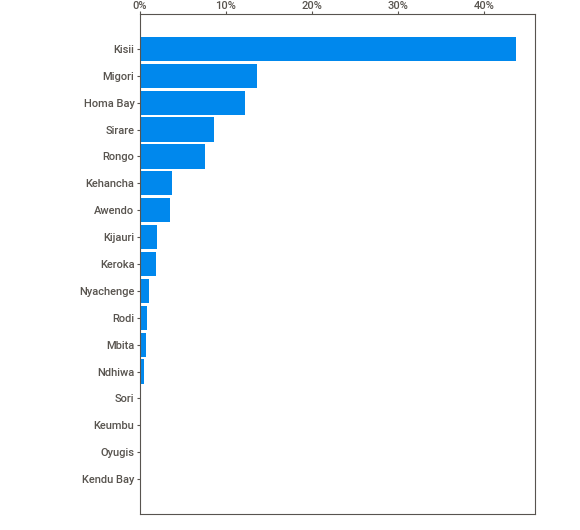
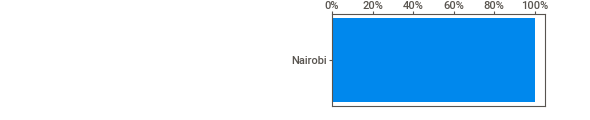
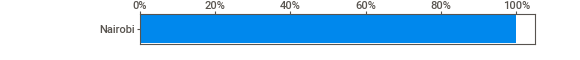
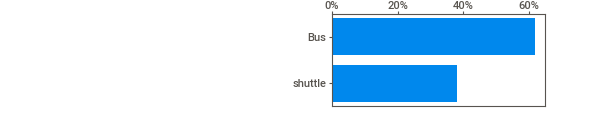
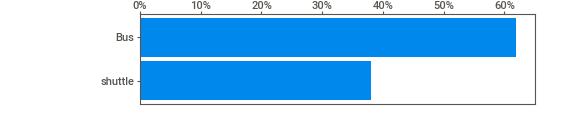
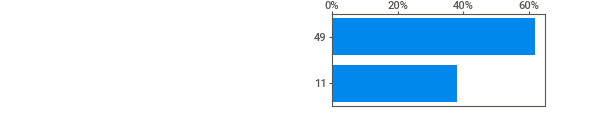
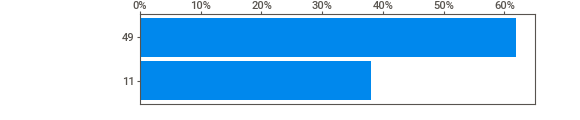
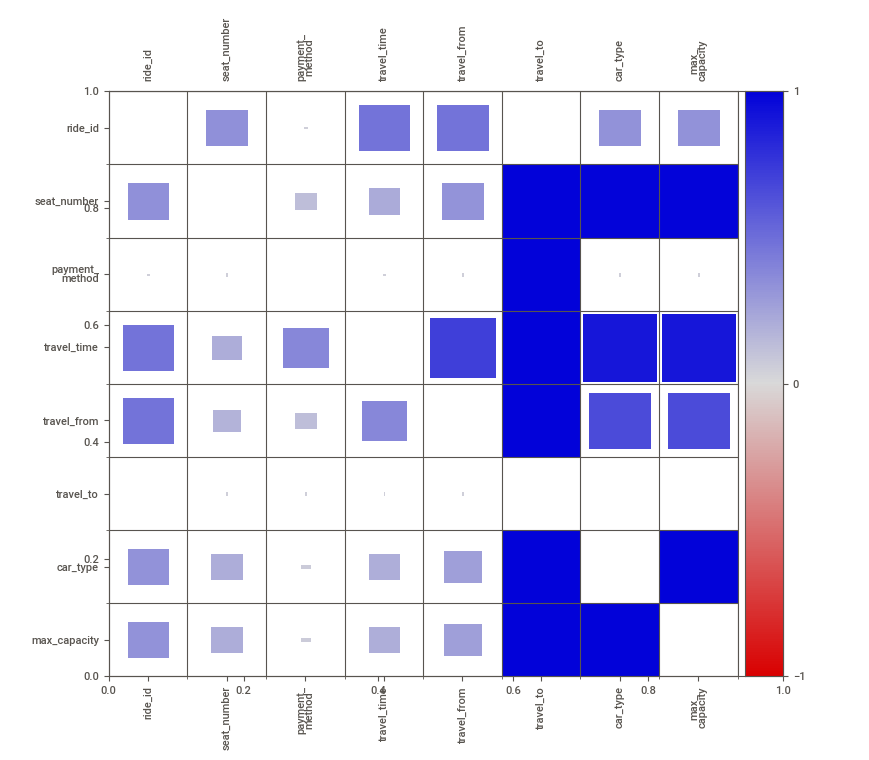
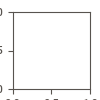

In [1390]:
report = sv.analyze(df)
report.show_notebook()

In [1391]:
df.isna().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [1392]:
df.duplicated().sum()

0

In [ ]:
df['travel_date'] = pd.to_datetime(df['travel_date'], format='%d-%m-%y')
df['Year'] = df['travel_date'].dt.year
df['Month'] = df['travel_date'].dt.month
df['Day'] = df['travel_date'].dt.day
df['Hour'] = pd.to_datetime(df['travel_time'], format='%H:%M').dt.hour
df['Minutes'] = pd.to_datetime(df['travel_time'], format='%H:%M').dt.minute


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Year,Month,Day,Hour,Minutes
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017,10,17,7,15
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017,11,19,7,12
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017,11,26,7,5
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017,11,27,7,10
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017,11,27,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,2018,4,20,8,0
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49,2018,4,20,8,0
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49,2018,4,20,8,0
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49,2018,4,20,7,8


In [1394]:
df2['travel_date'] = pd.to_datetime(df2['travel_date'], errors='coerce')
df2['Year'] = df2['travel_date'].dt.year
df2['Month'] = df2['travel_date'].dt.month
df2['Day'] = df2['travel_date'].dt.day
df2['Hour'] = pd.to_datetime(df2['travel_time'], format='%H:%M').dt.hour
df2['Minutes'] = pd.to_datetime(df2['travel_time'], format='%H:%M').dt.minute

df2

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Year,Month,Day,Hour,Minutes
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,2018,5,7,7,6
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,2018,5,6,11,8
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,2018,5,4,5,0
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,2018,5,4,9,10
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,2018,5,4,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...
1106,15336,2018-05-07,07:01,Oyugis,Nairobi,Bus,49,2018,5,7,7,1
1107,15337,2018-05-07,07:08,Kehancha,Nairobi,Bus,49,2018,5,7,7,8
1108,15338,2018-05-07,07:04,Rongo,Nairobi,Bus,49,2018,5,7,7,4
1109,15339,2018-05-07,07:05,Ndhiwa,Nairobi,Bus,49,2018,5,7,7,5


In [1395]:
df['number_of_ticket'] = df.groupby(['travel_from', 'car_type', 'max_capacity', 'Year', 'Month', 'Day', 'Hour', 'Minutes'])['travel_from'].transform('count')
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Year,Month,Day,Hour,Minutes,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017,10,17,7,15,1
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017,11,19,7,12,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017,11,26,7,5,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017,11,27,7,10,5
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017,11,27,7,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,2018,4,20,8,0,1
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49,2018,4,20,8,0,29
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49,2018,4,20,8,0,29
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49,2018,4,20,7,8,27


In [1396]:
label_encoder = preprocessing.LabelEncoder()
df['travel_from']= label_encoder.fit_transform(df['travel_from'])
df['car_type']= label_encoder.fit_transform(df['car_type'])
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Year,Month,Day,Hour,Minutes,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,9,Nairobi,0,49,2017,10,17,7,15,1
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,9,Nairobi,0,49,2017,11,19,7,12,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,4,Nairobi,0,49,2017,11,26,7,5,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,1,Nairobi,0,49,2017,11,27,7,10,5
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,9,Nairobi,0,49,2017,11,27,7,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,0,Nairobi,0,49,2018,4,20,8,0,1
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,9,Nairobi,0,49,2018,4,20,8,0,29
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,9,Nairobi,0,49,2018,4,20,8,0,29
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,0,Nairobi,0,49,2018,4,20,7,8,27


In [1397]:
label_encoder = preprocessing.LabelEncoder()
df2['travel_from']= label_encoder.fit_transform(df2['travel_from'])
df2['car_type']= label_encoder.fit_transform(df2['car_type'])
df2

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Year,Month,Day,Hour,Minutes
0,247,2018-05-07,07:06,5,Nairobi,0,49,2018,5,7,7,6
1,256,2018-05-06,11:08,5,Nairobi,1,11,2018,5,6,11,8
2,275,2018-05-04,05:00,5,Nairobi,1,11,2018,5,4,5,0
3,285,2018-05-04,09:10,5,Nairobi,1,11,2018,5,4,9,10
4,286,2018-05-04,09:20,5,Nairobi,1,11,2018,5,4,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...
1106,15336,2018-05-07,07:01,10,Nairobi,0,49,2018,5,7,7,1
1107,15337,2018-05-07,07:08,2,Nairobi,0,49,2018,5,7,7,8
1108,15338,2018-05-07,07:04,12,Nairobi,0,49,2018,5,7,7,4
1109,15339,2018-05-07,07:05,8,Nairobi,0,49,2018,5,7,7,5


In [1398]:
X =  df[['travel_from', 'car_type', 'max_capacity', 'Year', 'Month', 'Day', 'Hour', 'Minutes']]
Y = df[['number_of_ticket']]

In [1399]:
X_test = df2[['travel_from', 'car_type', 'max_capacity', 'Year', 'Month', 'Day', 'Hour', 'Minutes']]

In [1400]:
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

# Standardize data
X = (X - mean) / std_dev

X

,travel_from,car_type,max_capacity,Year,Month,Day,Hour,Minutes
0,0.389527,-0.784005,0.784005,-1.664244,1.177412,0.312283,-0.437585,-0.049446
1,0.389527,-0.784005,0.784005,-1.664244,1.411108,0.557960,-0.437585,-0.239568
2,-0.808036,-0.784005,0.784005,-1.664244,1.411108,1.417830,-0.437585,-0.683185
3,-1.526574,-0.784005,0.784005,-1.664244,1.411108,1.540668,-0.437585,-0.366316
4,0.389527,-0.784005,0.784005,-1.664244,1.411108,1.540668,-0.437585,-0.239568
...,...,...,...,...,...,...,...,...
51640,-1.766086,-0.784005,0.784005,0.600873,-0.224763,0.680798,-0.166027,-1.000054
51641,0.389527,-0.784005,0.784005,0.600873,-0.224763,0.680798,-0.166027,-1.000054
51642,0.389527,-0.784005,0.784005,0.600873,-0.224763,0.680798,-0.166027,-1.000054
51643,-1.766086,-0.784005,0.784005,0.600873,-0.224763,0.680798,-0.437585,-0.493063


In [1401]:
mean = np.mean(X_test, axis=0)
std_dev = np.std(X, axis=0)

# Standardize data
X_test = (X_test - mean) / std_dev

X_test

,travel_from,car_type,max_capacity,Year,Month,Day,Hour,Minutes
0,-1.006301,-0.460846,17.512151,0.0,0.673267,-11.19712,-2.252025,-13.169217
1,-1.006301,0.539154,-20.487849,0.0,0.673267,-12.19712,1.747975,-11.169217
2,-1.006301,0.539154,-20.487849,0.0,0.673267,-14.19712,-4.252025,-19.169217
3,-1.006301,0.539154,-20.487849,0.0,0.673267,-14.19712,-0.252025,-9.169217
4,-1.006301,0.539154,-20.487849,0.0,0.673267,-14.19712,-0.252025,0.830783
...,...,...,...,...,...,...,...,...
1106,3.993699,-0.460846,17.512151,0.0,0.673267,-11.19712,-2.252025,-18.169217
1107,-4.006301,-0.460846,17.512151,0.0,0.673267,-11.19712,-2.252025,-11.169217
1108,5.993699,-0.460846,17.512151,0.0,0.673267,-11.19712,-2.252025,-15.169217
1109,1.993699,-0.460846,17.512151,0.0,0.673267,-11.19712,-2.252025,-14.169217


In [1402]:
rs = np.random.RandomState(0)
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,travel_from,car_type,max_capacity,Year,Month,Day,Hour,Minutes
travel_from,1.000000,-0.095019,0.095019,0.059649,-0.055320,-0.011936,0.378610,-0.022556
car_type,-0.095019,1.000000,-1.000000,-0.198429,0.149319,-0.054198,-0.097581,0.574098
max_capacity,0.095019,-1.000000,1.000000,0.198429,-0.149319,0.054198,0.097581,-0.574098
Year,0.059649,-0.198429,0.198429,1.000000,-0.978756,-0.046853,0.062172,-0.125632
Month,-0.055320,0.149319,-0.149319,-0.978756,1.000000,-0.010467,-0.039581,0.109388
Day,-0.011936,-0.054198,0.054198,-0.046853,-0.010467,1.000000,-0.012382,-0.047170
Hour,0.378610,-0.097581,0.097581,0.062172,-0.039581,-0.012382,1.000000,-0.094643
Minutes,-0.022556,0.574098,-0.574098,-0.125632,0.109388,-0.047170,-0.094643,1.000000


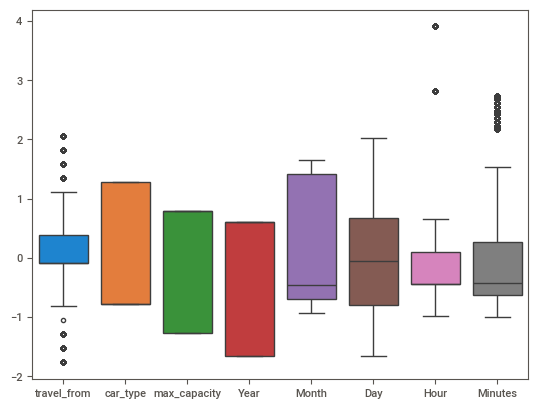

In [1403]:
sns.boxplot(data=X)
plt.show()

In [1404]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size =0.20, random_state= 42)

In [1405]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [1406]:
importances = model.feature_importances_

In [1407]:
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

        Feature  Importance
0   travel_from    0.264416
5           Day    0.190593
7       Minutes    0.179512
1      car_type    0.141557
2  max_capacity    0.131094
4         Month    0.070111
6          Hour    0.018789
3          Year    0.003928


In [1408]:
# Select features based on importance threshold
selector = SelectFromModel(model, threshold=0.03, prefit=True)  # Threshold can be adjusted
X_selected = selector.transform(X)

print(f"Selected features: {X.columns[selector.get_support()]}")

Selected features: Index(['travel_from', 'car_type', 'max_capacity', 'Month', 'Day', 'Minutes'], dtype='object')


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [1409]:
y_pred = model.predict(x_test)  # Predictions on the test set
mse = mean_squared_error(y_test, y_pred)  # Compare with the true test labels
print(f"Predicted: {y_pred}")
print(f"Mean Squared Error: {mse}")

Predicted: [11.   20.   28.   ... 31.    3.27 23.  ]
Mean Squared Error: 0.8586659889631135


In [1410]:
model.score(x_train,y_train)

0.9990777561533581

In [1411]:
dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [1412]:
df2['predicted_tickets'] = model.predict(X_test)
df2.to_csv('test_with_predictions.csv', index=False)


In [1413]:
v = pd.read_csv('test_with_predictions.csv')
v.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Year,Month,Day,Hour,Minutes,predicted_tickets
0,247,2018-05-07,07:06,5,Nairobi,0,49,2018,5,7,7,6,2.82
1,256,2018-05-06,11:08,5,Nairobi,1,11,2018,5,6,11,8,2.57
2,275,2018-05-04,05:00,5,Nairobi,1,11,2018,5,4,5,0,1.61
3,285,2018-05-04,09:10,5,Nairobi,1,11,2018,5,4,9,10,2.08
4,286,2018-05-04,09:20,5,Nairobi,1,11,2018,5,4,9,20,2.31


In [1414]:
predictions = v[['ride_id', 'predicted_tickets']]
predictions.to_csv('predictions.csv', index = False)

In [1415]:
df =  df.to_csv('result.csv')